In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.
File descriptions

    train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.
    test.csv contains the test data.
    sample_submission.csv is submission file showing the correct format.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv',index_col='id')
test = pd.read_csv('./data/test.csv',index_col='id')

In [3]:
train.columns

Index([u'target', u'ps_ind_01', u'ps_ind_02_cat', u'ps_ind_03',
       u'ps_ind_04_cat', u'ps_ind_05_cat', u'ps_ind_06_bin', u'ps_ind_07_bin',
       u'ps_ind_08_bin', u'ps_ind_09_bin', u'ps_ind_10_bin', u'ps_ind_11_bin',
       u'ps_ind_12_bin', u'ps_ind_13_bin', u'ps_ind_14', u'ps_ind_15',
       u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_reg_01',
       u'ps_reg_02', u'ps_reg_03', u'ps_car_01_cat', u'ps_car_02_cat',
       u'ps_car_03_cat', u'ps_car_04_cat', u'ps_car_05_cat', u'ps_car_06_cat',
       u'ps_car_07_cat', u'ps_car_08_cat', u'ps_car_09_cat', u'ps_car_10_cat',
       u'ps_car_11_cat', u'ps_car_11', u'ps_car_12', u'ps_car_13',
       u'ps_car_14', u'ps_car_15', u'ps_calc_01', u'ps_calc_02', u'ps_calc_03',
       u'ps_calc_04', u'ps_calc_05', u'ps_calc_06', u'ps_calc_07',
       u'ps_calc_08', u'ps_calc_09', u'ps_calc_10', u'ps_calc_11',
       u'ps_calc_12', u'ps_calc_13', u'ps_calc_14', u'ps_calc_15_bin',
       u'ps_calc_16_bin', u'ps_calc_17_bin', u'ps_c

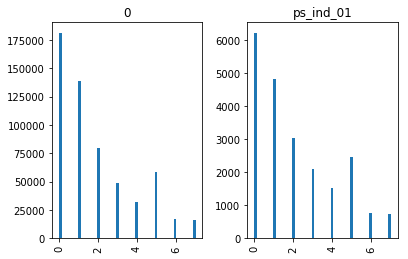

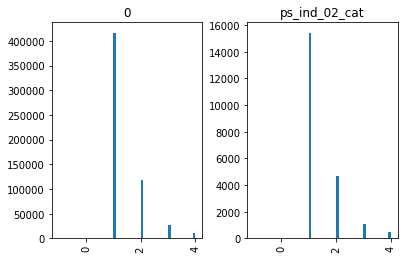

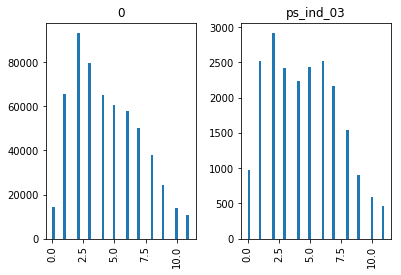

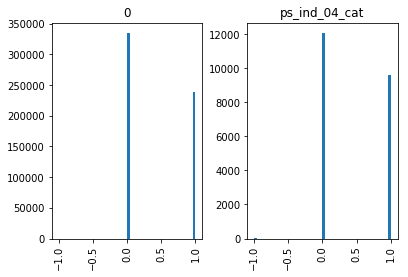

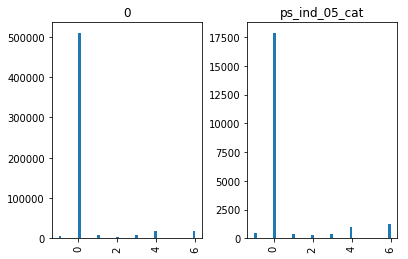

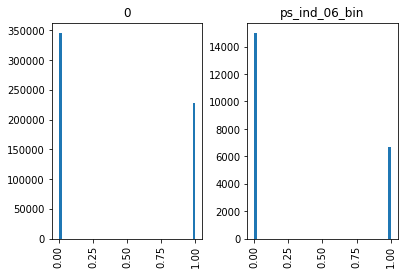

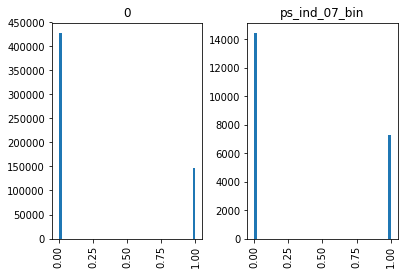

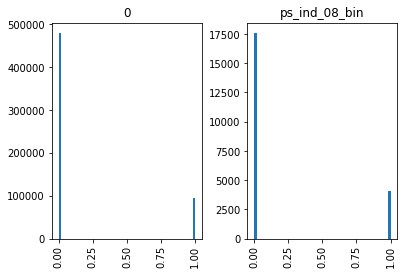

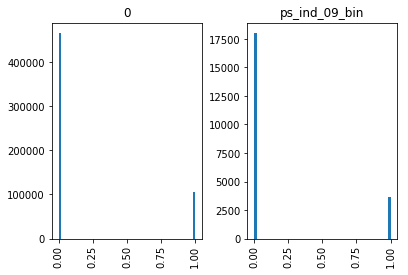

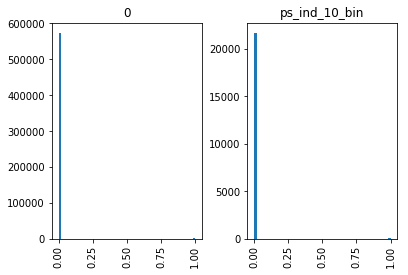

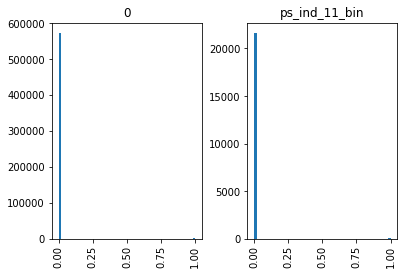

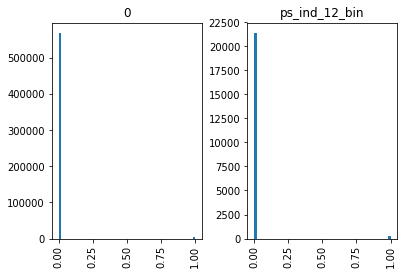

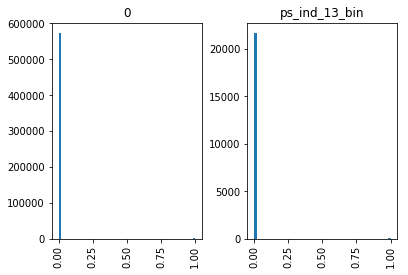

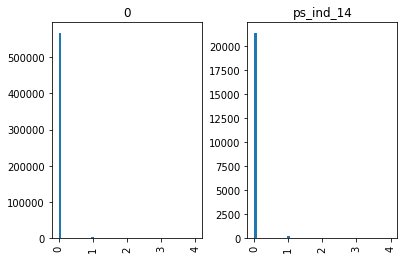

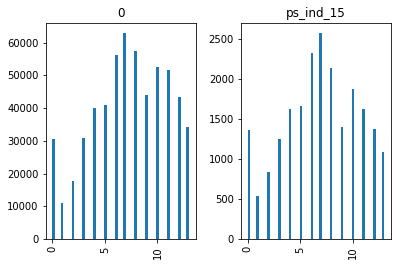

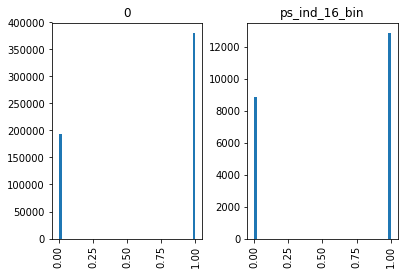

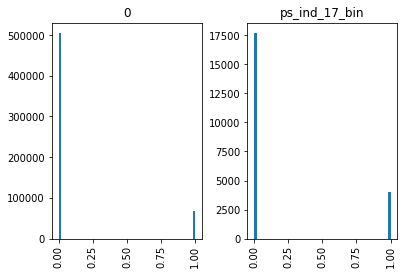

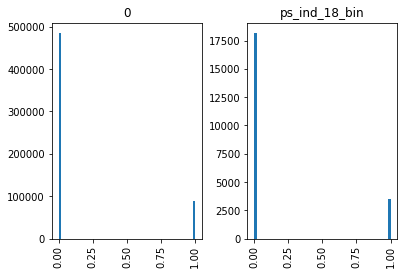

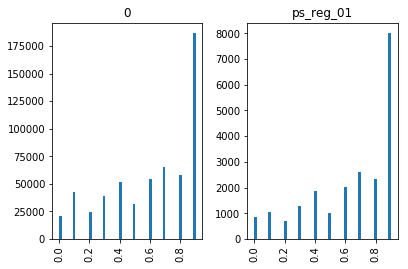

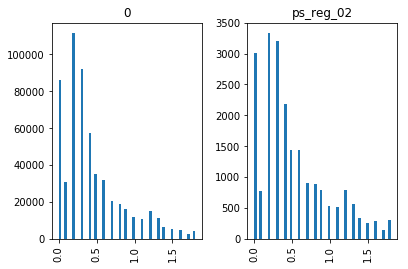

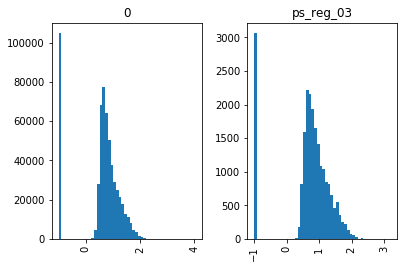

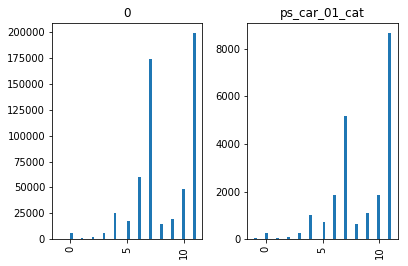

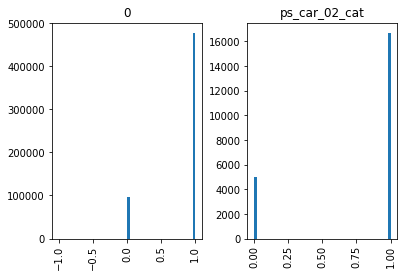

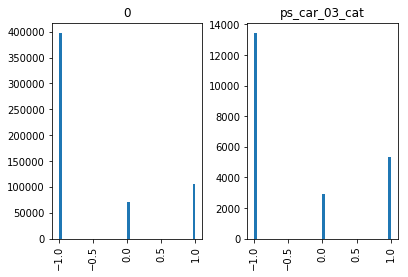

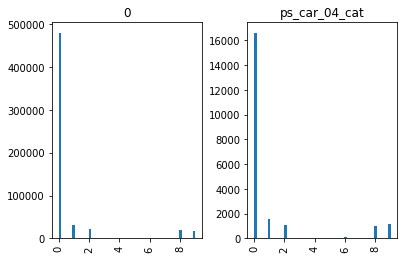

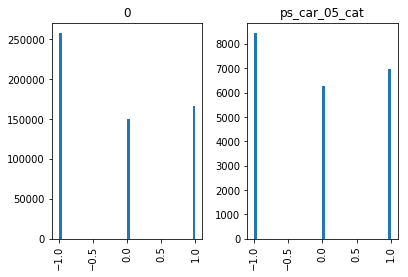

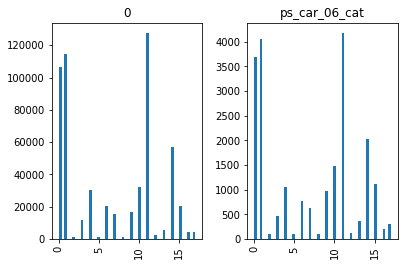

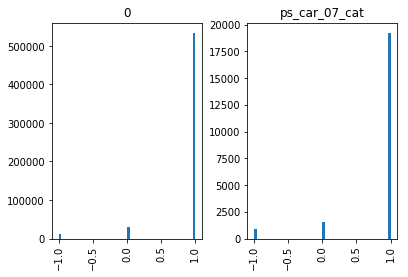

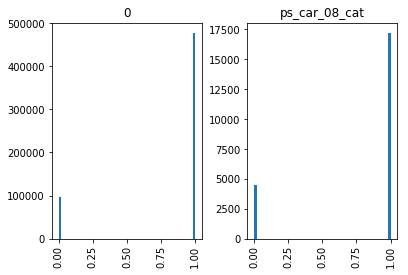

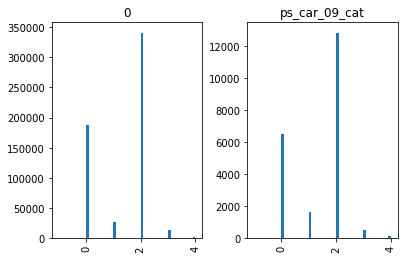

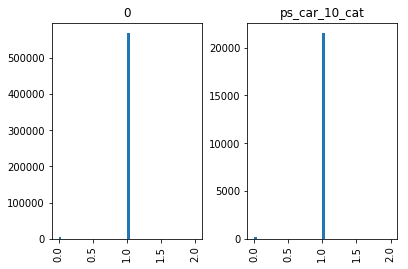

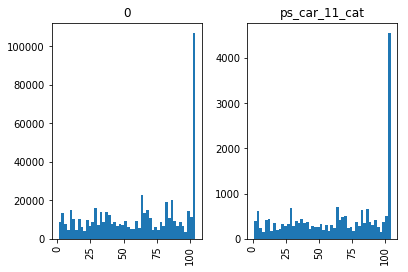

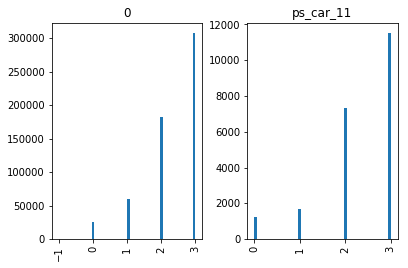

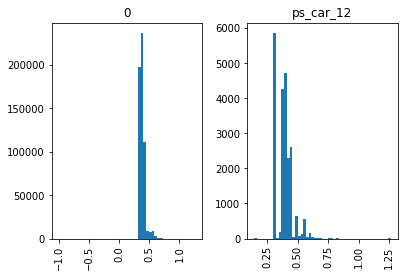

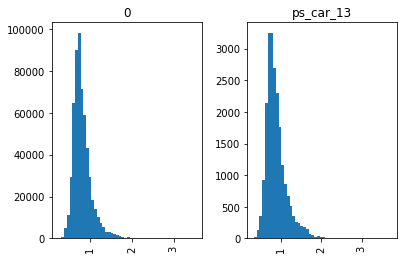

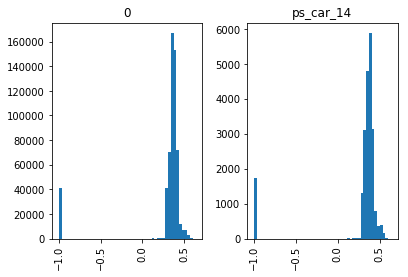

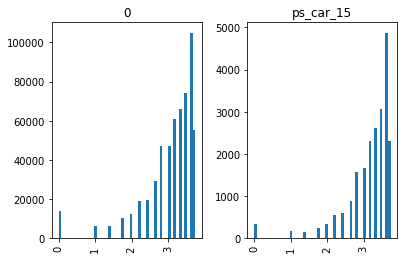

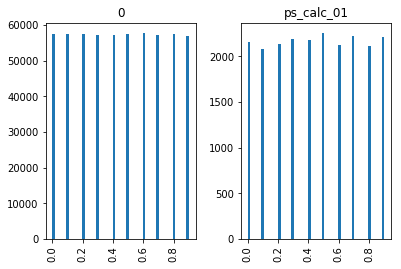

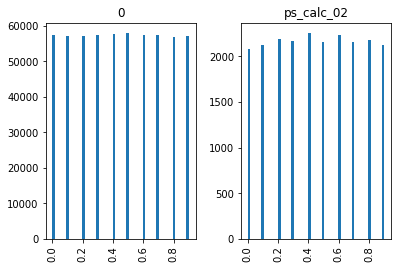

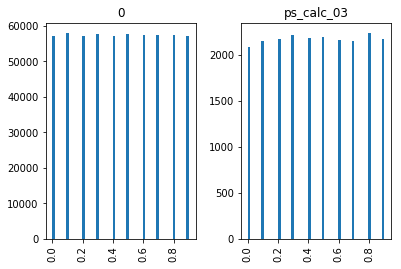

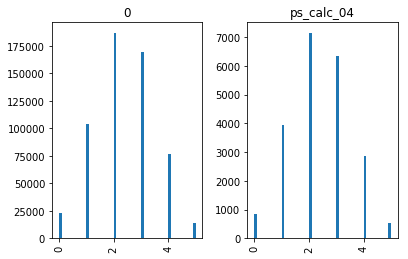

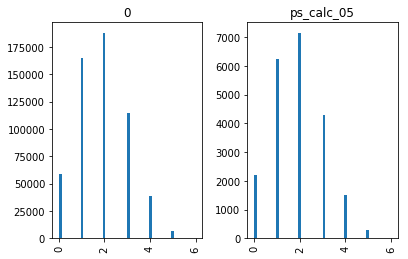

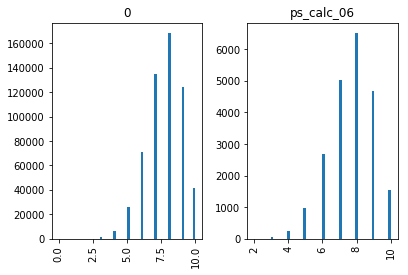

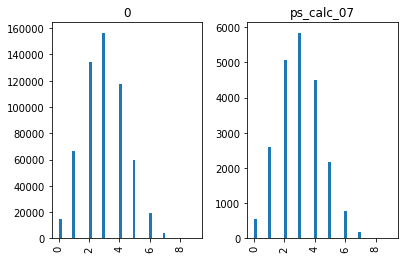

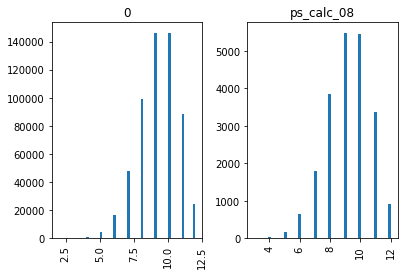

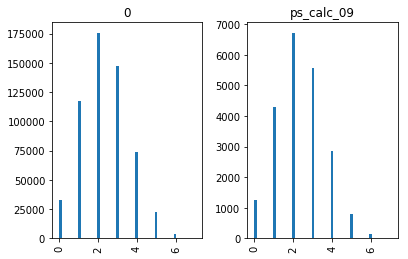

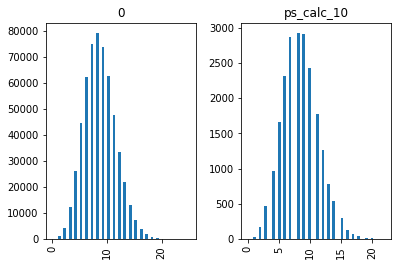

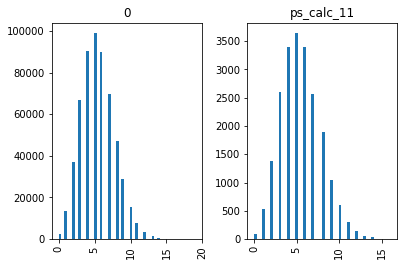

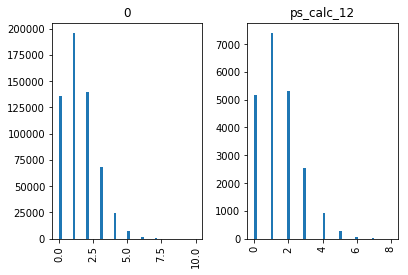

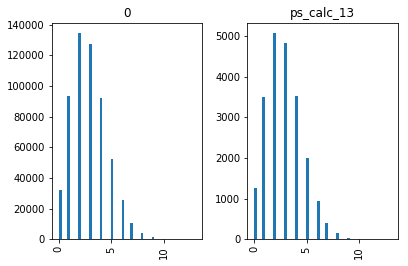

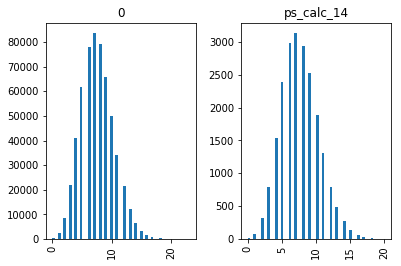

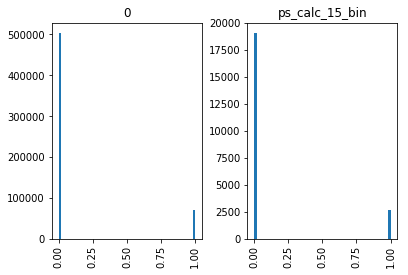

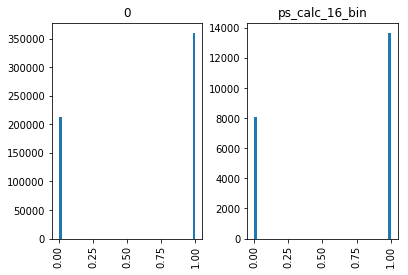

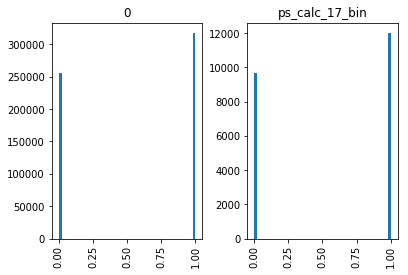

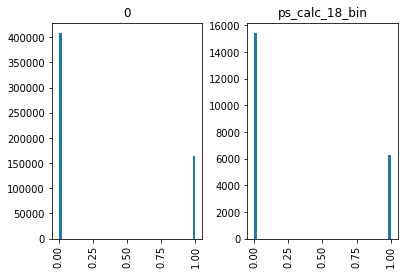

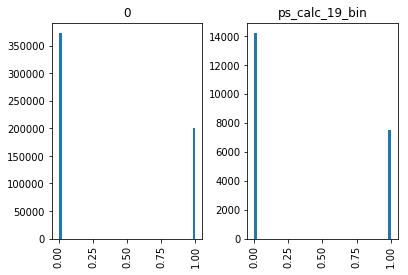

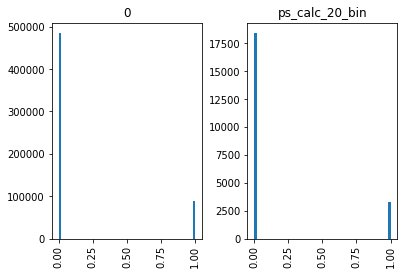

In [41]:
for cName in train.columns.drop('target'):
    train.hist(bins=50,by = 'target',column = cName)
    plt.title(cName)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33ae1794d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f33adee2690>], dtype=object)

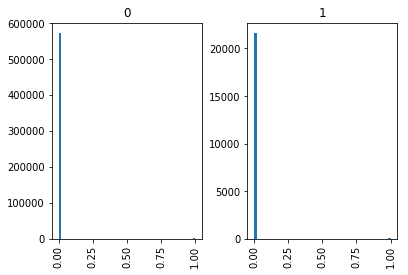

In [36]:
train.hist(bins=50,by = 'target',column = 'ps_ind_11_bin')

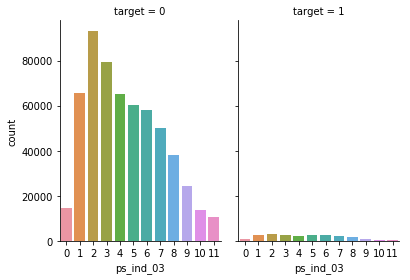

In [22]:
sns.factorplot(x="ps_ind_03", col="target", data=train, kind="count", size=4, aspect=.7);

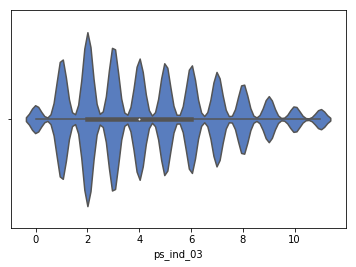

In [24]:
sns.violinplot(x="ps_ind_03", hue="target", data=train, palette="muted", split=True)

Классы несбалансированы

Посмотреть на корреляцию данных и целевой переменной

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b5448850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f33b43fe190>], dtype=object)

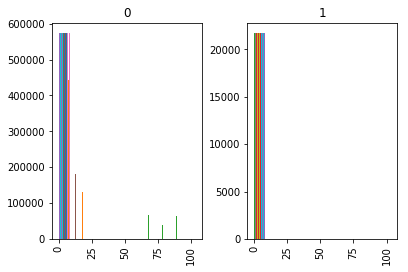

In [7]:
train.hist(by='target')

In [ ]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
...                     data=tips, palette="muted", split=True)

# CatBoost

In [4]:
from catboost import CatBoostClassifier
from catboost import Pool

In [5]:
trainPool = Pool(train.drop('target',axis = 1),train.target)
testPool  = Pool(test)

In [7]:
# specify the training parameters 
model = CatBoostClassifier(iterations=1000, depth=10, learning_rate=0.05, loss_function='Logloss',thread_count=6)
#train the model
model.fit(trainPool,verbose=True, plot=True)

CatboostIpythonWidget(layout=Layout(align_self=u'stretch', height=u'500px'))

Borders for float features generated
0:	learn 0.6199704004	total: 2.11s	remaining: 35m 7s
1:	learn 0.5563040689	total: 3.29s	remaining: 27m 20s
2:	learn 0.5016537997	total: 4.35s	remaining: 24m 6s
3:	learn 0.4547150069	total: 5.18s	remaining: 21m 29s
4:	learn 0.4147486125	total: 5.73s	remaining: 18m 59s
5:	learn 0.3800393921	total: 6.46s	remaining: 17m 50s
6:	learn 0.349869481	total: 7.25s	remaining: 17m 7s
7:	learn 0.3241809882	total: 8s	remaining: 16m 32s
8:	learn 0.3020645465	total: 8.77s	remaining: 16m 6s
9:	learn 0.282984118	total: 9.51s	remaining: 15m 41s
10:	learn 0.2666234291	total: 10.4s	remaining: 15m 31s
11:	learn 0.2526726332	total: 10.8s	remaining: 14m 49s
12:	learn 0.2405395814	total: 11.6s	remaining: 14m 41s
13:	learn 0.2299399418	total: 12.4s	remaining: 14m 34s
14:	learn 0.2206317569	total: 13.2s	remaining: 14m 26s
15:	learn 0.2125809362	total: 13.9s	remaining: 14m 15s
16:	learn 0.2056134797	total: 14.5s	remaining: 13m 59s
17:	learn 0.1994736596	total: 15.8s	remaining: 

148:	learn 0.149981072	total: 2m 35s	remaining: 14m 50s
149:	learn 0.1499062934	total: 2m 38s	remaining: 14m 55s
150:	learn 0.1498718084	total: 2m 39s	remaining: 14m 58s
151:	learn 0.1498278805	total: 2m 41s	remaining: 15m 3s
152:	learn 0.1498085354	total: 2m 44s	remaining: 15m 7s
153:	learn 0.1497661731	total: 2m 45s	remaining: 15m 11s
154:	learn 0.1497572295	total: 2m 46s	remaining: 15m 9s
155:	learn 0.1497462944	total: 2m 47s	remaining: 15m 6s
156:	learn 0.1496996341	total: 2m 48s	remaining: 15m 7s
157:	learn 0.149684858	total: 2m 50s	remaining: 15m 10s
158:	learn 0.1496836283	total: 2m 51s	remaining: 15m 9s
159:	learn 0.1496729644	total: 2m 52s	remaining: 15m 6s
160:	learn 0.1496592187	total: 2m 53s	remaining: 15m 4s
161:	learn 0.1496133743	total: 2m 54s	remaining: 15m 2s
162:	learn 0.1495714514	total: 2m 55s	remaining: 15m 2s
163:	learn 0.1495244384	total: 2m 57s	remaining: 15m 3s
164:	learn 0.1495140985	total: 2m 58s	remaining: 15m 3s
165:	learn 0.1494988563	total: 2m 59s	remaini

294:	learn 0.1467703841	total: 5m 12s	remaining: 12m 26s
295:	learn 0.1467360475	total: 5m 13s	remaining: 12m 25s
296:	learn 0.1467102907	total: 5m 14s	remaining: 12m 23s
297:	learn 0.1466971065	total: 5m 14s	remaining: 12m 21s
298:	learn 0.1466711452	total: 5m 17s	remaining: 12m 23s
299:	learn 0.1466524749	total: 5m 18s	remaining: 12m 23s
300:	learn 0.1466443605	total: 5m 20s	remaining: 12m 23s
301:	learn 0.1466228721	total: 5m 21s	remaining: 12m 22s
302:	learn 0.1466002812	total: 5m 23s	remaining: 12m 23s
303:	learn 0.1465843845	total: 5m 25s	remaining: 12m 24s
304:	learn 0.1465736824	total: 5m 25s	remaining: 12m 22s
305:	learn 0.1465608007	total: 5m 27s	remaining: 12m 22s
306:	learn 0.1465311274	total: 5m 28s	remaining: 12m 20s
307:	learn 0.146489565	total: 5m 29s	remaining: 12m 19s
308:	learn 0.1464803668	total: 5m 30s	remaining: 12m 18s
309:	learn 0.146453381	total: 5m 31s	remaining: 12m 18s
310:	learn 0.1464242161	total: 5m 32s	remaining: 12m 17s
311:	learn 0.146406733	total: 5m 

440:	learn 0.1441947761	total: 7m 39s	remaining: 9m 42s
441:	learn 0.1441773353	total: 7m 40s	remaining: 9m 41s
442:	learn 0.1441685648	total: 7m 41s	remaining: 9m 39s
443:	learn 0.144148037	total: 7m 42s	remaining: 9m 39s
444:	learn 0.1441269158	total: 7m 43s	remaining: 9m 37s
445:	learn 0.1440943518	total: 7m 44s	remaining: 9m 36s
446:	learn 0.1440854601	total: 7m 45s	remaining: 9m 35s
447:	learn 0.1440667216	total: 7m 45s	remaining: 9m 33s
448:	learn 0.1440615744	total: 7m 46s	remaining: 9m 32s
449:	learn 0.1440319269	total: 7m 47s	remaining: 9m 31s
450:	learn 0.1440297144	total: 7m 48s	remaining: 9m 29s
451:	learn 0.1440292325	total: 7m 48s	remaining: 9m 28s
452:	learn 0.1439965717	total: 7m 50s	remaining: 9m 27s
453:	learn 0.1439882127	total: 7m 51s	remaining: 9m 27s
454:	learn 0.1439749121	total: 7m 52s	remaining: 9m 25s
455:	learn 0.1439675494	total: 7m 53s	remaining: 9m 24s
456:	learn 0.1439546626	total: 7m 53s	remaining: 9m 23s
457:	learn 0.1439358173	total: 7m 54s	remaining: 

588:	learn 0.1428314277	total: 10m 10s	remaining: 7m 6s
589:	learn 0.1428311207	total: 10m 11s	remaining: 7m 4s
590:	learn 0.1428106651	total: 10m 12s	remaining: 7m 3s
591:	learn 0.142806269	total: 10m 12s	remaining: 7m 2s
592:	learn 0.142798705	total: 10m 13s	remaining: 7m 1s
593:	learn 0.142798667	total: 10m 14s	remaining: 6m 59s
594:	learn 0.1427985771	total: 10m 15s	remaining: 6m 58s
595:	learn 0.1427984959	total: 10m 16s	remaining: 6m 57s
596:	learn 0.1427984153	total: 10m 17s	remaining: 6m 56s
597:	learn 0.1427983448	total: 10m 18s	remaining: 6m 55s
598:	learn 0.1427853172	total: 10m 19s	remaining: 6m 54s
599:	learn 0.1427852787	total: 10m 20s	remaining: 6m 53s
600:	learn 0.1427839339	total: 10m 20s	remaining: 6m 52s
601:	learn 0.1427764346	total: 10m 21s	remaining: 6m 50s
602:	learn 0.1427749157	total: 10m 23s	remaining: 6m 50s
603:	learn 0.1427580226	total: 10m 24s	remaining: 6m 49s
604:	learn 0.1427577582	total: 10m 26s	remaining: 6m 48s
605:	learn 0.1427575244	total: 10m 27s	

733:	learn 0.1422339577	total: 12m 54s	remaining: 4m 40s
734:	learn 0.1422339367	total: 12m 55s	remaining: 4m 39s
735:	learn 0.142232421	total: 12m 56s	remaining: 4m 38s
736:	learn 0.142230232	total: 12m 58s	remaining: 4m 37s
737:	learn 0.1422302232	total: 13m	remaining: 4m 37s
738:	learn 0.1422302202	total: 13m 2s	remaining: 4m 36s
739:	learn 0.1422301359	total: 13m 3s	remaining: 4m 35s
740:	learn 0.1422301284	total: 13m 4s	remaining: 4m 34s
741:	learn 0.1422300257	total: 13m 5s	remaining: 4m 33s
742:	learn 0.1422188097	total: 13m 5s	remaining: 4m 31s
743:	learn 0.1422188035	total: 13m 6s	remaining: 4m 30s
744:	learn 0.1422187885	total: 13m 7s	remaining: 4m 29s
745:	learn 0.1422184502	total: 13m 8s	remaining: 4m 28s
746:	learn 0.1422142095	total: 13m 9s	remaining: 4m 27s
747:	learn 0.1422141945	total: 13m 10s	remaining: 4m 26s
748:	learn 0.142211919	total: 13m 11s	remaining: 4m 25s
749:	learn 0.1422119182	total: 13m 12s	remaining: 4m 24s
750:	learn 0.1421773143	total: 13m 14s	remainin

878:	learn 0.141843697	total: 15m 21s	remaining: 2m 6s
879:	learn 0.1418412609	total: 15m 21s	remaining: 2m 5s
880:	learn 0.1418412522	total: 15m 22s	remaining: 2m 4s
881:	learn 0.141841248	total: 15m 23s	remaining: 2m 3s
882:	learn 0.1418412403	total: 15m 24s	remaining: 2m 2s
883:	learn 0.141841233	total: 15m 24s	remaining: 2m 1s
884:	learn 0.141833841	total: 15m 25s	remaining: 2m
885:	learn 0.1418338366	total: 15m 26s	remaining: 1m 59s
886:	learn 0.1418193901	total: 15m 28s	remaining: 1m 58s
887:	learn 0.1418093998	total: 15m 29s	remaining: 1m 57s
888:	learn 0.1418055397	total: 15m 30s	remaining: 1m 56s
889:	learn 0.1418055258	total: 15m 32s	remaining: 1m 55s
890:	learn 0.1418055172	total: 15m 33s	remaining: 1m 54s
891:	learn 0.1417938476	total: 15m 34s	remaining: 1m 53s
892:	learn 0.1417938397	total: 15m 35s	remaining: 1m 52s
893:	learn 0.1417938294	total: 15m 37s	remaining: 1m 51s
894:	learn 0.1417938221	total: 15m 39s	remaining: 1m 50s
895:	learn 0.1417938174	total: 15m 39s	remain

In [8]:
# make the prediction using the resulting model
preds = model.predict_proba(testPool)[:,1]

## make submission file
df = pd.DataFrame(preds,columns=['target'],index=test.index)
df.to_csv('submission.csv',index_label='id')

score 0.274

## Балансировка классов

In [9]:
# specify the training parameters 
model2 = CatBoostClassifier(iterations=1000, depth=10, learning_rate=0.05, loss_function='Logloss',thread_count=6,class_weights=[0.2, 0.8])
#train the model
model2.fit(trainPool,verbose=True, plot=True)

CatboostIpythonWidget(layout=Layout(align_self=u'stretch', height=u'500px'))

Borders for float features generated
0:	learn 0.6578137708	total: 1.41s	remaining: 23m 26s
1:	learn 0.6265159792	total: 2.11s	remaining: 17m 33s
2:	learn 0.5986964845	total: 4.18s	remaining: 23m 8s
3:	learn 0.5741945447	total: 4.95s	remaining: 20m 31s
4:	learn 0.5521775641	total: 5.73s	remaining: 18m 59s
5:	learn 0.5325381735	total: 6.49s	remaining: 17m 54s
6:	learn 0.5153572919	total: 8.53s	remaining: 20m 10s
7:	learn 0.4998426351	total: 9.84s	remaining: 20m 20s
8:	learn 0.48604168	total: 11.1s	remaining: 20m 27s
9:	learn 0.4739304556	total: 11.9s	remaining: 19m 37s
10:	learn 0.463218382	total: 12.7s	remaining: 19m
11:	learn 0.4536392746	total: 13.5s	remaining: 18m 30s
12:	learn 0.4451565735	total: 15.4s	remaining: 19m 29s
13:	learn 0.4375187262	total: 17.2s	remaining: 20m 8s
14:	learn 0.4307053678	total: 17.9s	remaining: 19m 35s
15:	learn 0.4247903878	total: 18.7s	remaining: 19m 12s
16:	learn 0.4194204758	total: 20.4s	remaining: 19m 37s
17:	learn 0.4146116704	total: 21.3s	remaining: 

148:	learn 0.3602658321	total: 2m 38s	remaining: 15m 2s
149:	learn 0.3602637915	total: 2m 39s	remaining: 15m 6s
150:	learn 0.3602636836	total: 2m 40s	remaining: 15m 1s
151:	learn 0.3602632891	total: 2m 41s	remaining: 14m 58s
152:	learn 0.3602631804	total: 2m 41s	remaining: 14m 53s
153:	learn 0.3602627479	total: 2m 43s	remaining: 14m 57s
154:	learn 0.3602624135	total: 2m 44s	remaining: 14m 54s
155:	learn 0.3602515115	total: 2m 44s	remaining: 14m 51s
156:	learn 0.3602510987	total: 2m 46s	remaining: 14m 52s
157:	learn 0.3602507848	total: 2m 46s	remaining: 14m 48s
158:	learn 0.3602496961	total: 2m 47s	remaining: 14m 44s
159:	learn 0.3602488224	total: 2m 47s	remaining: 14m 41s
160:	learn 0.3602487314	total: 2m 48s	remaining: 14m 39s
161:	learn 0.3602486489	total: 2m 49s	remaining: 14m 34s
162:	learn 0.3602423505	total: 2m 49s	remaining: 14m 32s
163:	learn 0.3602412755	total: 2m 50s	remaining: 14m 29s
164:	learn 0.3602410171	total: 2m 51s	remaining: 14m 29s
165:	learn 0.3602408847	total: 2m 

293:	learn 0.36013761	total: 4m 47s	remaining: 11m 30s
294:	learn 0.3601375881	total: 4m 49s	remaining: 11m 31s
295:	learn 0.3601375633	total: 4m 50s	remaining: 11m 30s
296:	learn 0.360137546	total: 4m 51s	remaining: 11m 30s
297:	learn 0.3601375235	total: 4m 52s	remaining: 11m 28s
298:	learn 0.3601374997	total: 4m 53s	remaining: 11m 28s
299:	learn 0.3601374832	total: 4m 55s	remaining: 11m 29s
300:	learn 0.3601374606	total: 4m 57s	remaining: 11m 29s
301:	learn 0.3601374452	total: 4m 58s	remaining: 11m 28s
302:	learn 0.3601374293	total: 4m 58s	remaining: 11m 27s
303:	learn 0.3601374077	total: 5m	remaining: 11m 27s
304:	learn 0.3601373858	total: 5m	remaining: 11m 25s
305:	learn 0.3601373642	total: 5m 1s	remaining: 11m 24s
306:	learn 0.3601373436	total: 5m 2s	remaining: 11m 23s
307:	learn 0.3601373228	total: 5m 4s	remaining: 11m 23s
308:	learn 0.3601372088	total: 5m 6s	remaining: 11m 25s
309:	learn 0.3601371902	total: 5m 8s	remaining: 11m 26s
310:	learn 0.3601371719	total: 5m 10s	remaining

439:	learn 0.3599756183	total: 7m 27s	remaining: 9m 29s
440:	learn 0.3599756129	total: 7m 29s	remaining: 9m 29s
441:	learn 0.3599756072	total: 7m 30s	remaining: 9m 28s
442:	learn 0.3599756022	total: 7m 32s	remaining: 9m 28s
443:	learn 0.3599755971	total: 7m 33s	remaining: 9m 27s
444:	learn 0.3599755917	total: 7m 34s	remaining: 9m 26s
445:	learn 0.3599755866	total: 7m 36s	remaining: 9m 26s
446:	learn 0.3599755826	total: 7m 36s	remaining: 9m 25s
447:	learn 0.3599755773	total: 7m 37s	remaining: 9m 23s
448:	learn 0.3599755724	total: 7m 38s	remaining: 9m 22s
449:	learn 0.3599755676	total: 7m 39s	remaining: 9m 21s
450:	learn 0.3599755624	total: 7m 40s	remaining: 9m 19s
451:	learn 0.3599755573	total: 7m 40s	remaining: 9m 18s
452:	learn 0.3599755282	total: 7m 41s	remaining: 9m 17s
453:	learn 0.3599755232	total: 7m 42s	remaining: 9m 16s
454:	learn 0.3599755181	total: 7m 42s	remaining: 9m 14s
455:	learn 0.3599755132	total: 7m 44s	remaining: 9m 14s
456:	learn 0.3599755087	total: 7m 45s	remaining:

586:	learn 0.3598150427	total: 10m 23s	remaining: 7m 18s
587:	learn 0.359815041	total: 10m 24s	remaining: 7m 17s
588:	learn 0.3598150394	total: 10m 25s	remaining: 7m 16s
589:	learn 0.3598150377	total: 10m 27s	remaining: 7m 15s
590:	learn 0.3598150356	total: 10m 27s	remaining: 7m 14s
591:	learn 0.3598150339	total: 10m 28s	remaining: 7m 13s
592:	learn 0.3598150204	total: 10m 30s	remaining: 7m 12s
593:	learn 0.3598150069	total: 10m 31s	remaining: 7m 11s
594:	learn 0.3598150048	total: 10m 32s	remaining: 7m 10s
595:	learn 0.3598148775	total: 10m 34s	remaining: 7m 10s
596:	learn 0.3598147804	total: 10m 36s	remaining: 7m 9s
597:	learn 0.3598147674	total: 10m 38s	remaining: 7m 9s
598:	learn 0.3598147545	total: 10m 39s	remaining: 7m 8s
599:	learn 0.3598146362	total: 10m 41s	remaining: 7m 7s
600:	learn 0.3598146236	total: 10m 42s	remaining: 7m 6s
601:	learn 0.3598146111	total: 10m 43s	remaining: 7m 5s
602:	learn 0.3598145222	total: 10m 44s	remaining: 7m 4s
603:	learn 0.35981451	total: 10m 46s	re

732:	learn 0.3596527362	total: 13m 3s	remaining: 4m 45s
733:	learn 0.3596527349	total: 13m 3s	remaining: 4m 44s
734:	learn 0.3596527338	total: 13m 4s	remaining: 4m 42s
735:	learn 0.3596527327	total: 13m 5s	remaining: 4m 41s
736:	learn 0.3596527315	total: 13m 6s	remaining: 4m 40s
737:	learn 0.3596527303	total: 13m 7s	remaining: 4m 39s
738:	learn 0.3596527291	total: 13m 8s	remaining: 4m 38s
739:	learn 0.359652728	total: 13m 9s	remaining: 4m 37s
740:	learn 0.3596527269	total: 13m 10s	remaining: 4m 36s
741:	learn 0.3596527257	total: 13m 11s	remaining: 4m 35s
742:	learn 0.3596527246	total: 13m 13s	remaining: 4m 34s
743:	learn 0.3596527234	total: 13m 14s	remaining: 4m 33s
744:	learn 0.3596527223	total: 13m 14s	remaining: 4m 32s
745:	learn 0.3596527211	total: 13m 15s	remaining: 4m 30s
746:	learn 0.3596527201	total: 13m 17s	remaining: 4m 29s
747:	learn 0.359652719	total: 13m 18s	remaining: 4m 29s
748:	learn 0.3596527179	total: 13m 20s	remaining: 4m 28s
749:	learn 0.3596527168	total: 13m 21s	re

877:	learn 0.3595546349	total: 15m 35s	remaining: 2m 9s
878:	learn 0.3595546342	total: 15m 37s	remaining: 2m 9s
879:	learn 0.3595546336	total: 15m 38s	remaining: 2m 7s
880:	learn 0.3595546331	total: 15m 38s	remaining: 2m 6s
881:	learn 0.3595546243	total: 15m 40s	remaining: 2m 5s
882:	learn 0.3595546236	total: 15m 40s	remaining: 2m 4s
883:	learn 0.3595546151	total: 15m 41s	remaining: 2m 3s
884:	learn 0.3595541573	total: 15m 43s	remaining: 2m 2s
885:	learn 0.359554149	total: 15m 44s	remaining: 2m 1s
886:	learn 0.3595245428	total: 15m 45s	remaining: 2m
887:	learn 0.3595245421	total: 15m 45s	remaining: 1m 59s
888:	learn 0.3595245414	total: 15m 46s	remaining: 1m 58s
889:	learn 0.3595245407	total: 15m 47s	remaining: 1m 57s
890:	learn 0.35952454	total: 15m 47s	remaining: 1m 55s
891:	learn 0.3595245394	total: 15m 48s	remaining: 1m 54s
892:	learn 0.3595245387	total: 15m 49s	remaining: 1m 53s
893:	learn 0.359524538	total: 15m 49s	remaining: 1m 52s
894:	learn 0.3595245374	total: 15m 50s	remaining

In [10]:
# make the prediction using the resulting model
preds = model2.predict_proba(testPool)[:,1]

## make submission file
df = pd.DataFrame(preds,columns=['target'],index=test.index)
df.to_csv('submission.csv',index_label='id')

In [14]:
model2.save_model('model2.cbm')

score 0.270

In [18]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)
 
def test_gini():
    def fequ(a,b):
        return abs( a -b) < 1e-6

    def T(a, p, g, n):
        assert( fequ(gini(a,p), g) )
        assert( fequ(gini_normalized(a,p), n) )
     
    T([1, 2, 3], [10, 20, 30], 0.111111, 1)
    T([1, 2, 3], [30, 20, 10], -0.111111, -1)
    T([1, 2, 3], [0, 0, 0], -0.111111, -1)
    T([3, 2, 1], [0, 0, 0], 0.111111, 1)
    T([1, 2, 4, 3], [0, 0, 0, 0], -0.1, -0.8)
    T([2, 1, 4, 3], [0, 0, 2, 1], 0.125, 1)
    T([0, 20, 40, 0, 10], [40, 40, 10, 5, 5], 0, 0)
    T([40, 0, 20, 0, 10], [1000000, 40, 40, 5, 5], 0.171428, 0.6)
    T([40, 20, 10, 0, 0], [40, 20, 10, 0, 0], 0.285714, 1)
    T([1, 1, 0, 1], [0.86, 0.26, 0.52, 0.32], -0.041666, -0.333333)

In [19]:
df

,target
id,
0,0.080512
1,0.094867
2,0.096114
3,0.062330
4,0.140384
5,0.162693
6,0.071537
8,0.128912
10,0.189059
